<a href="https://colab.research.google.com/github/matule00/mmd/blob/main/mmd_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import numpy as np

class TASEP:
    def __init__(self, N, L, p, gamma):
        """
        Initialize the TASEP simulation with given parameters.

        Args:
            N (int): Number of cars.
            L (int): Number of cells in the road.
            p (float): Probability of moving forward for the lead car.
            gamma (float): Attractive force parameter for following cars.
        """
        self.N = N  # Number of cars
        self.L = L  # Number of cells in the road
        self.p = p  # Probability of moving forward
        self.gamma = gamma  # Attractive force parameter
        self.iteration = 0  # Iteration counter
        self.first_move = 0

        # Initialize the road with empty cells
        self.road = np.zeros(self.L, dtype=int)
        # Place cars randomly on the road
        positions = np.random.choice(self.L, self.N, replace=False)
        self.road[positions] = 1

    def step(self): # Perform one step of the TASEP simulation.
        car_moved = False  # Flag to track if the lead car has moved
        '''
        In case of moving last car in the first step, we must adjust the range of
        for cyclus in order to prevent moving it twice – again at the end of the cyclus
        '''
        if self.road[self.L-1] == 1 and self.road[0] == 0 and np.random.rand() < self.p:
            self.road[0] = 1
            self.road[self.L-1] = 0
            self.first_move = 1
            car_moved = True
            for i in range(self.L - 2, 0, -1):  # Iterate from right to left
                if self.road[i] == 1 and self.road[i+1] == 0 and not car_moved:
                    if np.random.rand() < self.p:  # Move forward with probability p
                        self.road[i+1] = 1
                        self.road[i] = 0
                        car_moved = True
                elif self.road[i] == 1 and self.road[i+1] == 0 and car_moved:
                  if np.random.rand() < (1 + self.gamma)*self.p:  # Follow with probability (1 + gamma) * p
                        self.road[i+1] = 1
                        self.road[i] = 0
                        car_moved = True
                  else:
                    car_moved = False
                else: # If there is no car to move, there was no move forward
                  car_moved = False
        else:
            for i in range(self.L - 2, -1, -1):  # Iterate from right to left
                if self.road[i] == 1 and self.road[i+1] == 0 and not car_moved:
                    if np.random.rand() < self.p:  # Move forward with probability p
                        self.road[i+1] = 1
                        self.road[i] = 0
                        car_moved = True
                elif self.road[i] == 1 and self.road[i+1] == 0 and car_moved:
                  if np.random.rand() < (1 + self.gamma)*self.p:  # Follow with probability (1 + gamma) * p
                        self.road[i+1] = 1
                        self.road[i] = 0
                        car_moved = True
                  else:
                    car_moved = False
                else: # If there is no car to move, there was no move forward
                  car_moved = False
        self.iteration += 1 # Increment iteration counter

    def display(self):  # Display the current state of the road.
        print(f'Iteration num. {self.iteration}: ' + ''.join(map(str, self.road)))

In [43]:
N = 50  # Number of cars
L = 200  # Number of cells in the road
p = 0.5  # Probability of moving forward for the lead car
gamma = -0.2  # Attractive force parameter

tasep = TASEP(N, L, p, gamma)
for _ in range(9):
    tasep.step()
    tasep.display()

Iteration num. 1: 00010100100010100000000110000100010101101100010000001001000110101001010010100110000010110001000101111001000001000100000000001010000000000010000000000000000010000001000010000000000000000000010000111010
Iteration num. 2: 00010100100010010000000110000010001101101100010000001000100110100101001010100110000010110000100101110100100000100010000000000110000000000001000000000000000001000001000010000000000000000000010000111010
Iteration num. 3: 00001100100010010000000110000010000111101010001000001000010101010011001001100101000001011000010101110010010000010010000000000011000000000000100000000000000000100001000010000000000000000000001000110101
Iteration num. 4: 10000110100010010000000101000001000111010101001000000100010101010001101001010010100001010100010101101010001000010010000000000011000000000000010000000000000000100001000010000000000000000000000100110100
Iteration num. 5: 0100011001000101000000010100000100010111010100100000001000110010100011010100100110000011010000101110101000

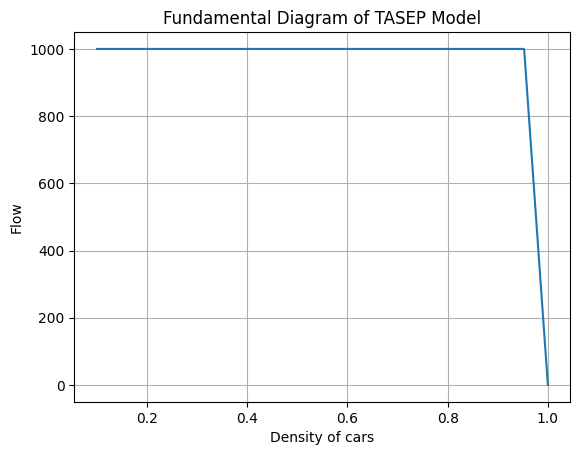

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Density range
density_range = np.linspace(0.1, 1.0, 20)

# Lists to store density and flow data
densities = []
flows = []

# Run simulation for different densities
for density in density_range:
    num_cars = int(density * L)
    tasep = TASEP(num_cars, L, p, gamma)

    # Let the simulation reach steady state
    for _ in range(1000):
        tasep.step()

    # Measure flow (number of cars passing a specific point per unit time)
    flow = 0
    for _ in range(1000):
        tasep.step()
        if tasep.first_move == 1:
          flow += 1

    # Normalize flow by time and add to lists
    normalized_flow = flow
    densities.append(density)
    flows.append(normalized_flow)

# Plot fundamental diagram
plt.plot(densities, flows)
plt.xlabel('Density of cars')
plt.ylabel('Flow')
plt.title('Fundamental Diagram of TASEP Model')
plt.grid(True)
plt.show()